In [1]:
# Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf 
from scipy.interpolate import interp1d
import seaborn.objects as so
from scipy.stats import chisquare

In [2]:
cancellations_scotland_fp = os.path.join(os.getcwd(), "datasets", "cancellations_in_scotland.csv")
cancellations_scotland = pd.read_csv(cancellations_scotland_fp)


In [3]:
cancellations_scotland.isna().sum()

_id                              0
Month                            0
Country                          0
TotalOperations                  0
TotalOperationsQF              105
TotalCancelled                   0
TotalCancelledQF               105
CancelledByPatientReason         0
CancelledByPatientReasonQF     105
ClinicalReason                   0
ClinicalReasonQF               105
NonClinicalCapacityReason        0
NonClinicalCapacityReasonQF    105
OtherReason                      0
OtherReasonQF                  105
dtype: int64

In [4]:
# drop uncessary columns drop also country cos its only scotland and like everything is the same and id too cos like useless yk
cancellations_scotland.drop(columns=["_id","Country","TotalOperationsQF","TotalCancelledQF","CancelledByPatientReasonQF","ClinicalReasonQF","NonClinicalCapacityReasonQF","OtherReasonQF"], inplace=True)

In [5]:
cancellations_scotland

,Month,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,201505,28810,2695,1057,853,523,262
1,201506,30941,2800,1194,870,449,287
2,201507,27725,2642,1083,854,457,248
3,201508,28948,2630,1080,912,491,147
4,201509,30938,2829,1122,1000,535,172
...,...,...,...,...,...,...,...
100,202309,23209,2105,739,738,541,87
101,202310,24201,2286,775,797,580,134
102,202311,25922,2277,737,820,582,138
103,202312,20837,2014,677,725,515,97


In [6]:
cancellations_scotland["Month"] = pd.to_datetime(cancellations_scotland.Month, format="%Y%m")
# change the month format to a much better data type

In [7]:
cancellations_scotland

,Month,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason
0,2015-05-01,28810,2695,1057,853,523,262
1,2015-06-01,30941,2800,1194,870,449,287
2,2015-07-01,27725,2642,1083,854,457,248
3,2015-08-01,28948,2630,1080,912,491,147
4,2015-09-01,30938,2829,1122,1000,535,172
...,...,...,...,...,...,...,...
100,2023-09-01,23209,2105,739,738,541,87
101,2023-10-01,24201,2286,775,797,580,134
102,2023-11-01,25922,2277,737,820,582,138
103,2023-12-01,20837,2014,677,725,515,97


In [8]:
# change a column to a much more suitable name
cancellations_scotland.rename(columns={"Month":"Date"}, inplace=True)

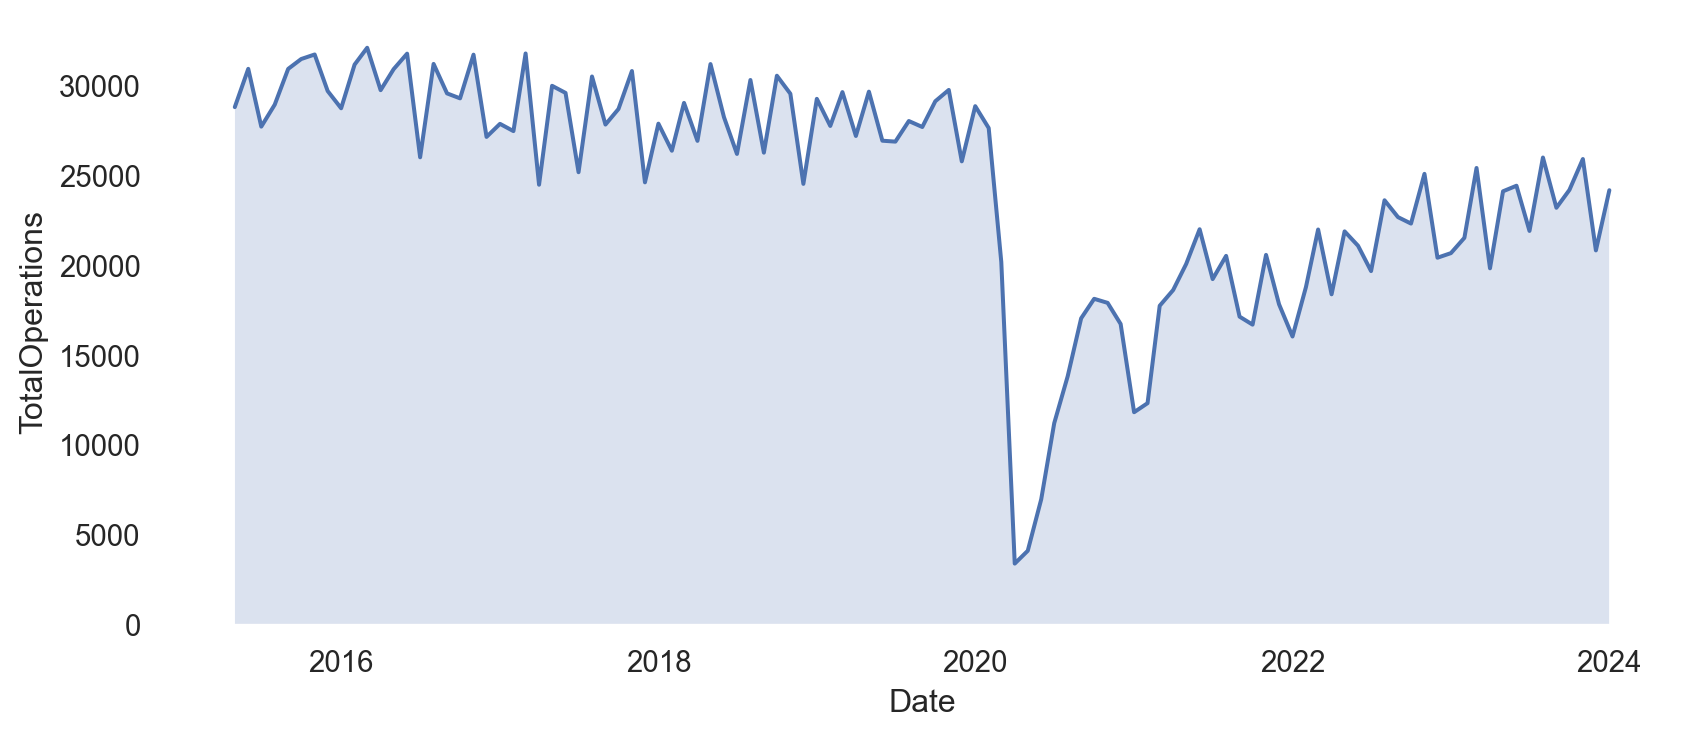

In [9]:
scot = so.Plot(cancellations_scotland, "Date", "TotalOperations").layout(size=(9, 4)).theme({"axes.facecolor": "w"})
scot.add(so.Area(edgewidth=0)).add(so.Line())

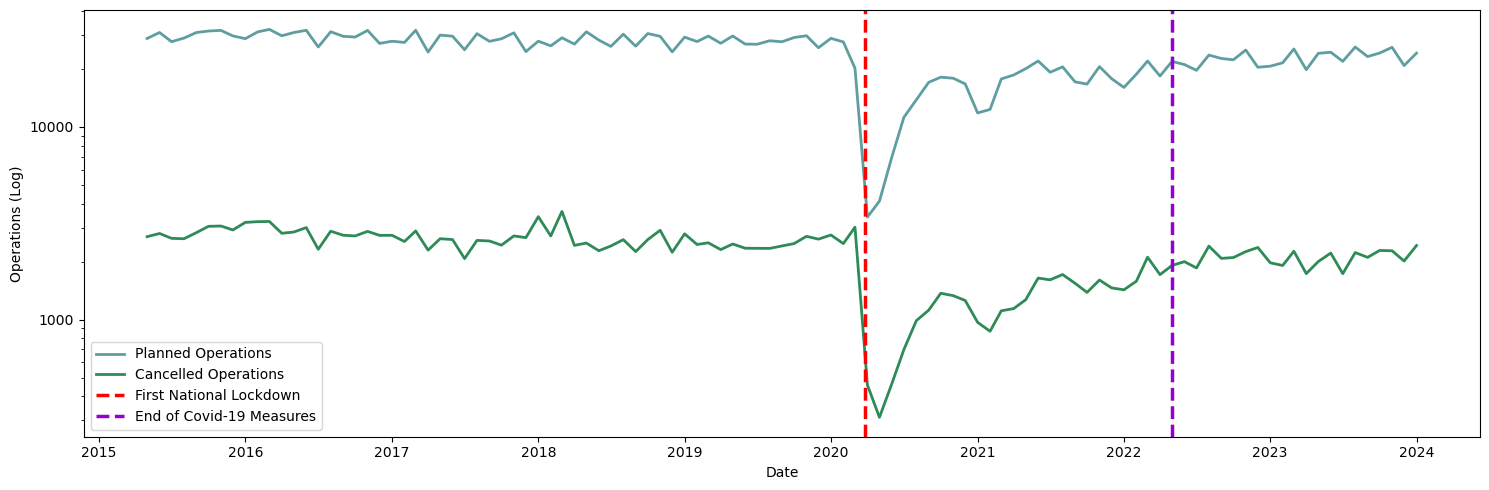

In [27]:
fig, ax = plt.subplots(figsize=(15,5))

sns.color_palette("tab10")
sns.lineplot(data=cancellations_scotland, x="Date", y="TotalOperations", label="Planned Operations", color = "cadetblue", linewidth=2)
sns.lineplot(data=cancellations_scotland, x="Date", y="TotalCancelled", label="Cancelled Operations", color="seagreen", linewidth=2)
plt.ylabel("Operations (Log)")
ax.set(yscale="log")
ax.yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.axvline(x=np.datetime64("2020-03-26"), label="First National Lockdown", linestyle = "--", color = 'r', linewidth = 2.5)
plt.axvline(x=np.datetime64("2022-04-30"), label="End of Covid-19 Measures", linestyle = "--", color = 'darkviolet', linewidth = 2.5)
plt.tight_layout()
plt.legend()
plt.savefig('figure1.pdf')

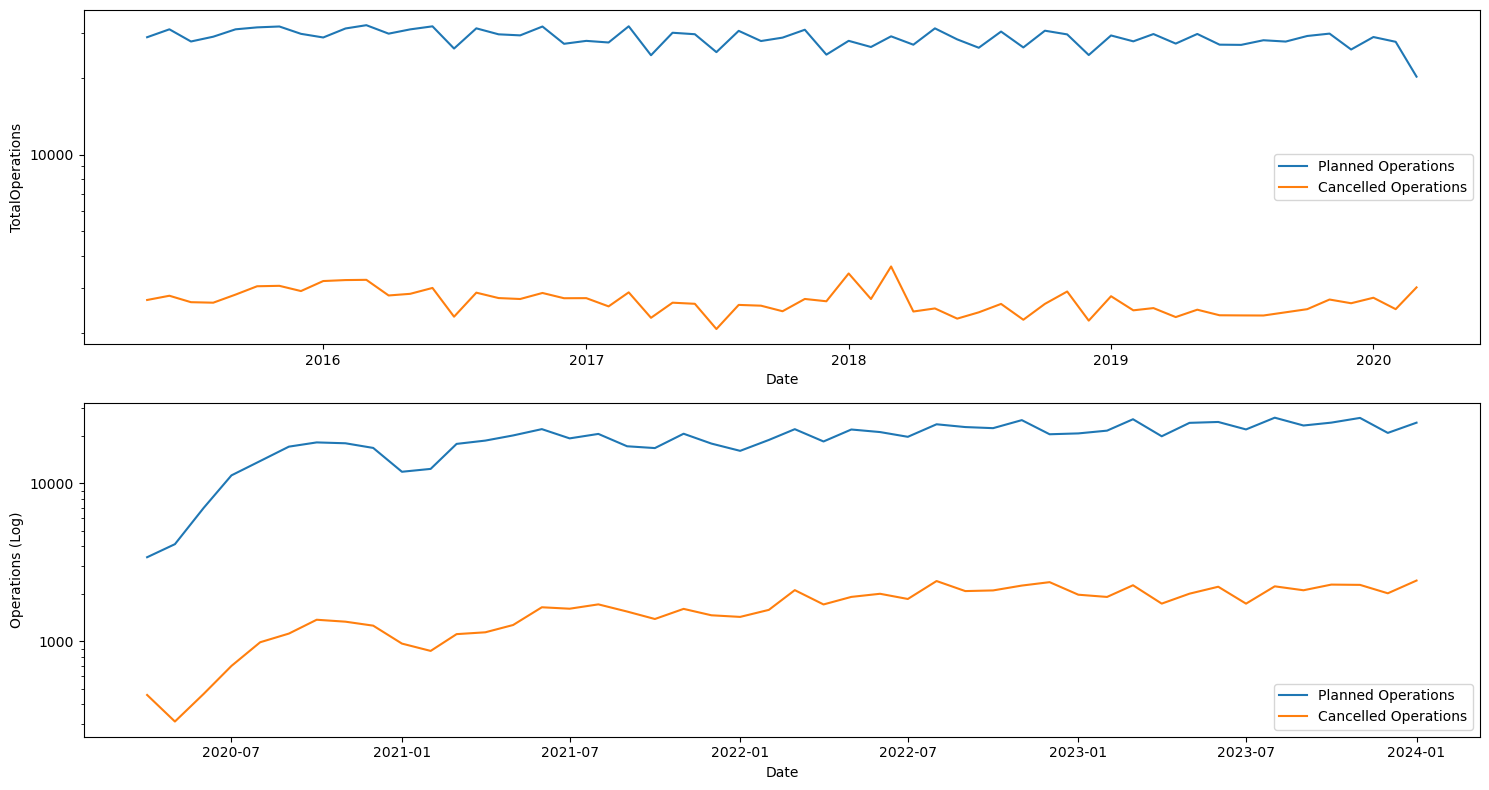

In [11]:
fig, axs = plt.subplots(2, figsize=(15,8))

plt.rc('axes', titlesize=8)     # fontsize of the axes title
plt.rc('axes', labelsize=10) 

#before covid
cancellations_scotland_beforecovid = cancellations_scotland[cancellations_scotland["Date"] <= np.datetime64("2020-03-26")]
sns.lineplot(ax=axs[0], data=cancellations_scotland_beforecovid, x="Date", y="TotalOperations", label="Planned Operations")
sns.lineplot(ax=axs[0], data=cancellations_scotland_beforecovid, x="Date", y="TotalCancelled", label="Cancelled Operations")
plt.ylabel("Operations (Log)")
axs[0].set(yscale="log")
axs[0].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

#after covid
cancellations_scotland_aftercovid = cancellations_scotland[cancellations_scotland["Date"] >= np.datetime64("2020-03-26")]
sns.lineplot(ax=axs[1], data=cancellations_scotland_aftercovid, x="Date", y="TotalOperations", label="Planned Operations")
sns.lineplot(ax=axs[1], data=cancellations_scotland_aftercovid, x="Date", y="TotalCancelled", label="Cancelled Operations")
plt.ylabel("Operations (Log)")
axs[1].set(yscale="log")
axs[1].yaxis.set_major_formatter(matplotlib.ticker.ScalarFormatter())

plt.tight_layout()
plt.legend()
plt.show()

In [12]:
def get_season(x):
    match x.month:
        case 12 | 1 | 2:
            return "Winter"
        case 3 | 4 | 5:
            return "Spring"
        case 6 | 7 | 8:
            return "Summer"
        case 9 | 10 | 11:
            return "Autumn"
        
cancel_scotland = cancellations_scotland.copy(True)
cancel_scotland["Season"] = cancellations_scotland["Date"].apply(get_season)
cancel_scotland


,Date,TotalOperations,TotalCancelled,CancelledByPatientReason,ClinicalReason,NonClinicalCapacityReason,OtherReason,Season
0,2015-05-01,28810,2695,1057,853,523,262,Spring
1,2015-06-01,30941,2800,1194,870,449,287,Summer
2,2015-07-01,27725,2642,1083,854,457,248,Summer
3,2015-08-01,28948,2630,1080,912,491,147,Summer
4,2015-09-01,30938,2829,1122,1000,535,172,Autumn
...,...,...,...,...,...,...,...,...
100,2023-09-01,23209,2105,739,738,541,87,Autumn
101,2023-10-01,24201,2286,775,797,580,134,Autumn
102,2023-11-01,25922,2277,737,820,582,138,Autumn
103,2023-12-01,20837,2014,677,725,515,97,Winter


In [13]:
#sns.barplot(data=cancel_scotland, x="Season", y="TotalCancelled")


In [14]:
#cancel_scotland["Cancelled/Planned"] = cancel_scotland["TotalCancelled"]/cancel_scotland["TotalOperations"]

In [15]:
#cancel_scotland

In [16]:
"""season_totalcancelled = cancel_scotland.groupby(["Season"]).sum()[["TotalCancelled","TotalOperations"]]
season_totalcancelled.reset_index(inplace=True)
season_totalcancelled"""

'season_totalcancelled = cancel_scotland.groupby(["Season"]).sum()[["TotalCancelled","TotalOperations"]]\nseason_totalcancelled.reset_index(inplace=True)\nseason_totalcancelled'

In [17]:
"""season_totalcancelled_aut = pd.DataFrame({"Season":["Autumn","Others"], "TotalCancelled":[], "TotalOperations":[]})
season_totalcancelled_aut"""

'season_totalcancelled_aut = pd.DataFrame({"Season":["Autumn","Others"], "TotalCancelled":[], "TotalOperations":[]})\nseason_totalcancelled_aut'